In [1]:
!pip install -U numpy

     |████████████████████████████████| 15.7 MB 59 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
!pip install -U scikit-multiflow

In [2]:
!pip install river

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
import glob
import numpy as np

In [50]:
data_df = pd.read_csv("/content/all_train_data.txt",header=None)
data_df

# df_each = [pd.read_csv(filename, header=None, delimiter=',', names=[f"A{i}" for i in range(11)]) for filename in glob.glob("*.txt"), encoding= 'unicode_escape']
# data_df = pd.concat(df_each, axis=0)

,0,1,2,3,4,5,6,7,8,9,10
0,415.25,344.25,1,0,1,1,1,3,4,5,6
1,317.60,178.00,7,6,6,0,1,13,13,6,7
2,344.20,218.60,6,6,8,2,2,21,16,11,11
3,297.30,387.30,2,8,10,2,3,13,10,13,7
4,354.70,372.60,4,8,9,1,3,17,10,8,4
...,...,...,...,...,...,...,...,...,...,...,...
382,472.50,536.00,0,9,11,2,4,8,0,9,0
383,385.00,536.00,2,7,8,1,5,15,0,12,7
384,227.50,536.00,0,7,8,1,5,14,0,7,0
385,435.40,536.00,1,12,13,1,5,17,0,12,1


In [51]:
# data_df.drop(columns=['level'], inplace=True)

In [52]:
from river import cluster
from river import stream
from river import tree
from river import evaluate
from river import metrics

streamkmeans = cluster.STREAMKMeans(n_clusters=4, halflife=0.5, sigma=1.5, seed=0)

In [53]:
# dbstream = cluster.DBSTREAM(n_clusters=4 ,clustering_threshold = 1.5,
#                             fading_factor = 0.05,
#                              cleanup_interval = 4,
#                              intersection_factor = 0.5,
#                             minimum_weight = 1)

# for x, _ in stream.iter_array(X):
#     dbstream = dbstream.learn_one(x)

# dbstream.predict_one({0: 1, 1: 2})

In [54]:
dt_scaler = StandardScaler();
scaled_features = dt_scaler.fit_transform(data_df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=data_df.index, columns=data_df.columns)

In [55]:
clustream = cluster.CluStream(time_window=1,
                              n_macro_clusters=4,
                               seed=0,
                               halflife=0.4)

for x in scaled_features_df.iterrows():
    data = {}
    for y in range(x[1].size):
        data[y] = x[1][y]
    clustream = clustream.learn_one(data)

In [56]:
# for x in scaled_features_df.iterrows():
#   data = {}
#   for y in range(x[1].size):
#     data[y] = x[1][y]
#   streamkmeans = streamkmeans.learn_one(data)

In [58]:
classes = []
for x in scaled_features_df.iterrows():
  data = {}
  for y in range(x[1].size):
    data[y] = x[1][y]

  classes.append(clustream.predict_one(data))
data_df['class'] = classes
data_df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,class
0,415.25,344.25,1,0,1,1,1,3,4,5,6,2
1,317.60,178.00,7,6,6,0,1,13,13,6,7,1
2,344.20,218.60,6,6,8,2,2,21,16,11,11,1
3,297.30,387.30,2,8,10,2,3,13,10,13,7,1
4,354.70,372.60,4,8,9,1,3,17,10,8,4,0
5,281.20,470.60,5,5,5,0,4,16,15,10,10,1
6,414.20,451.70,3,9,9,0,5,22,16,14,8,1
7,368.00,500.00,0,0,0,0,1,0,0,5,5,2
8,355.40,187.10,7,8,9,1,1,14,15,7,7,1
9,453.40,369.10,4,7,9,2,2,12,8,13,9,1


In [59]:
data_df['class'].unique()

array([2, 1, 0, 3])

In [60]:
from skmultiflow.trees import HoeffdingTreeClassifier,HoeffdingAdaptiveTreeClassifier,ExtremelyFastDecisionTreeClassifier,LabelCombinationHoeffdingTreeClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier

EFD = ExtremelyFastDecisionTreeClassifier

LCH = LabelCombinationHoeffdingTreeClassifier

HT = HoeffdingTreeClassifier()
HAT = HoeffdingAdaptiveTreeClassifier()
ARF = AdaptiveRandomForestClassifier()

In [61]:
model = tree.HoeffdingTreeClassifier(
  grace_period=100,
  split_confidence=1e-5,
  leaf_prediction='nb',
  nb_threshold=10,
)

In [62]:
train_datas = []
for x in list(data_df.iterrows()):
  data = {}
  print(x)
  for y in range(x[1].size-1):
    data[y] = x[1][y]
  model.learn_one(data, x[1]['class'])

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
5          2.0
6          2.0
7         21.0
8         16.0
9         11.0
10        11.0
class      1.0
Name: 2, dtype: float64)
(3, 0        297.3
1        387.3
2          2.0
3          8.0
4         10.0
5          2.0
6          3.0
7         13.0
8         10.0
9         13.0
10         7.0
class      1.0
Name: 3, dtype: float64)
(4, 0        354.7
1        372.6
2          4.0
3          8.0
4          9.0
5          1.0
6          3.0
7         17.0
8         10.0
9          8.0
10         4.0
class      0.0
Name: 4, dtype: float64)
(5, 0        281.2
1        470.6
2          5.0
3          5.0
4          5.0
5          0.0
6          4.0
7         16.0
8         15.0
9         10.0
10        10.0
class      1.0
Name: 5, dtype: float64)
(6, 0        414.2
1        451.7
2          3.0
3          9.0
4          9.0
5          0.0
6          5.0
7         22.0
8         16.0
9         14.0
10         8.0
class      1.0
Na

In [63]:
from skmultiflow.evaluation import EvaluatePrequential

eval = EvaluatePrequential(show_plot=True,
                           metrics=['f1','accuracy', 'kappa', 'model_size'],
                           n_wait=100)

In [64]:
cfiers = [HoeffdingTreeClassifier(), 
          HoeffdingAdaptiveTreeClassifier(),
          AdaptiveRandomForestClassifier()
          ,ExtremelyFastDecisionTreeClassifier(),
#           LabelCombinationHoeffdingTreeClassifier(n_labels=4)
         ]


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...


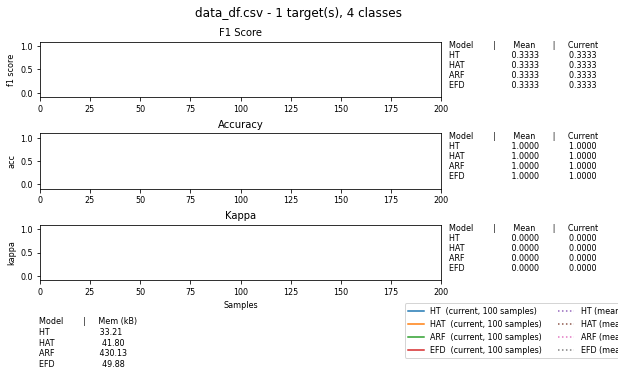

 ###############----- [74%] [4.41s]

<Figure size 432x288 with 0 Axes>

 #################### [100%] [6.70s]


<Figure size 432x288 with 0 Axes>

Processed samples: 387
Mean performance:
HT - Accuracy     : 0.8717
HT - Kappa        : 0.6532
HT - F1 score: 0.7696
HT - Size (kB)          : 33.2051
HAT - Accuracy     : 0.8663
HAT - Kappa        : 0.6398
HAT - F1 score: 0.7327
HAT - Size (kB)          : 42.6826
ARF - Accuracy     : 0.8128
ARF - Kappa        : 0.4322
ARF - F1 score: 0.6113
ARF - Size (kB)          : 634.2129
EFD - Accuracy     : 0.8021
EFD - Kappa        : 0.4428
EFD - F1 score: 0.5533
EFD - Size (kB)          : 82.8154


In [65]:
from skmultiflow.data import FileStream

data_df.to_csv('data_df.csv')
# df1.to_csv('data_df.csv')
stream = FileStream('data_df.csv')

eval.evaluate(stream=stream, model=cfiers, model_names=['HT', 'HAT','ARF','EFD']);
# eval.evaluate(stream=stream, model=cfiers, model_names=['HT', 'HAT','ARF','EFD','LCH']);

In [66]:
eval = EvaluatePrequential(show_plot=True,
                           metrics=['accuracy', 'kappa', 'model_size'],
                           n_wait=100)

In [67]:
joblib.dump(model, 'model69.h5')

['model69.h5']

In [ ]:
# Need to have add Head name in column again
#"xpos","ypos","coin","emnemy","shot","enemy/shot","level","keyX","keyY","respawn_enemy", "respawn_coin"

mean_collected_coin = list(data_df.groupby(['class']).mean()['coin'])
mean_enemies_kills = list(data_df.groupby(['class']).mean()['emnemy'])

print(mean_enemies_kills)
print(mean_collected_coin)

sum_df = pd.DataFrame()
sum_df['xpos'] = list(data_df.groupby(['class']).mean()['xpos'])
sum_df['ypos'] = list(data_df.groupby(['class']).mean()['ypos'])
sum_df['coin'] = list(data_df.groupby(['class']).mean()['coin'])
sum_df['enemy'] = list(data_df.groupby(['class']).mean()['emnemy'])
sum_df['shot'] = list(data_df.groupby(['class']).mean()['shot'])
sum_df['shot-enemy'] = list(data_df.groupby(['class']).mean()['enemy/shot'])
# sum_df['level'] = list(data_df.groupby(['class']).mean()['level'])
sum_df['keyX'] = list(data_df.groupby(['class']).mean()['keyX'])
sum_df['keyY'] = list(data_df.groupby(['class']).mean()['keyY'])
# sum_df['respawn_enemy'] = list(data_df.groupby(['class']).mean()['respawn_enemy'])
# sum_df['respawn_coin'] = list(data_df.groupby(['class']).mean()[' "respawn_coin"'])

In [ ]:
labels = []
num_labels = len(mean_collected_coin)
for i in range(num_labels):
    if i % 2 == 0:
        sorted_index = np.argsort(mean_collected_coin)
    else:
        sorted_index = np.argsort(mean_enemies_kills)

    sorted_index = list(sorted_index)
    sorted_index.reverse()
    for max_index in sorted_index:
        if max_index not in labels:
            labels.append(max_index)
            break

print(labels)

LABELS = {
    labels[0]: 'Hardcore Achiever',
    labels[1]: 'Hardcore Killer',
    labels[2]: 'Casual Achiever',
    labels[3]: 'Casual Killer',
}
print(LABELS)